In [1]:
import pandas as pd
import numpy as np

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
import tensorflow as tf


from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import shuffle

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, GRU

c:\Users\Rachel\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_path = pd.read_csv('../../Datasets/aug_final_df.csv')
clean_data_path = pd.read_csv('../../Datasets/final_df.csv')

# data_path = pd.read_csv('aug_final_df.csv')
# clean_data_path = pd.read_csv('final_df.csv')
clean_data_path.drop(columns=['Unnamed: 0', 'Emotions_without_gender'], axis=1, inplace=True)
clean_data_path.rename(columns={"Emotions_with_gender": "Emotions"}, inplace=True)
df_merged = pd.concat([data_path, clean_data_path], ignore_index=True, sort=False)
data_path.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,Mel124,Mel125,Mel126,Mel127,Tonnetz0,Tonnetz1,Tonnetz2,Tonnetz3,Tonnetz4,Tonnetz5
0,13,Ravdess\03-01-01-01-01-01-01.wav,-523.529545,27.241989,5.769787,9.279402,5.089218,-2.390328,-4.395784,-5.875705,...,0.000014,0.000014,1.288731e-05,1.067009e-05,-0.011892,0.014680,-0.037830,0.012758,0.002293,0.000711
1,5,Ravdess\03-01-01-01-01-01-02.wav,-496.500553,24.471357,-4.290021,-0.117138,-4.133275,-5.330633,-6.086381,-8.918441,...,0.000019,0.000019,1.951147e-05,1.724507e-05,-0.025786,0.017141,0.024213,-0.013041,0.001195,0.011456
2,13,Ravdess\03-01-01-01-01-01-03.wav,-493.828069,30.269077,0.099546,3.565363,1.506498,-3.990596,-9.876523,-5.602124,...,0.000035,0.000047,3.442724e-05,1.579058e-05,0.006586,-0.017492,0.010258,0.021191,0.001935,-0.012934
3,5,Ravdess\03-01-01-01-01-01-04.wav,-530.041269,19.985562,-2.764032,1.729861,-3.209140,-3.402472,-4.917748,-10.306199,...,0.000019,0.000015,1.158044e-05,9.503128e-06,-0.001818,0.001853,-0.001479,-0.022831,-0.008600,-0.004256
4,13,Ravdess\03-01-01-01-01-01-05.wav,-665.081016,51.012514,9.008959,12.308820,7.629854,-0.913261,-1.587498,-3.771605,...,0.000001,0.000001,8.860940e-07,2.348652e-07,-0.007477,0.020805,-0.052498,0.015439,0.011113,0.002884


In [3]:
data_path = shuffle(data_path)
data_path.tail()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,Mel124,Mel125,Mel126,Mel127,Tonnetz0,Tonnetz1,Tonnetz2,Tonnetz3,Tonnetz4,Tonnetz5
8429,14,Crema\1086_ITS_SAD_XX.wav,-409.407523,71.977855,42.740862,33.516418,14.771294,14.756510,-3.227103,-0.178563,...,0.000042,0.000041,0.000045,0.000044,-0.020795,-0.006437,-0.096003,-0.016975,0.006624,0.006186
6778,14,Crema\1066_IOM_SAD_XX.wav,-361.574786,94.637643,35.427668,29.989546,16.873220,3.097457,-1.471784,0.333234,...,0.000070,0.000074,0.000071,0.000074,-0.062921,-0.036086,-0.032067,0.095339,-0.005253,0.009460
5813,0,Crema\1054_IWW_ANG_XX.wav,-283.801217,78.910784,17.827067,12.935687,2.524384,-2.192319,-8.106053,-0.947354,...,0.000384,0.000337,0.000347,0.000319,0.024032,-0.006642,-0.036800,-0.058299,0.026259,0.007832
4661,11,Crema\1040_IWL_FEA_XX.wav,-291.581111,59.850986,24.971704,12.905864,7.376200,5.611733,4.525952,1.373493,...,0.000759,0.000784,0.000833,0.000771,0.027056,-0.030363,-0.039159,-0.028402,0.022848,0.023955
9902,7,Tess\OAF_Pleasant_surprise\OAF_check_ps.wav,-399.955641,48.399619,4.144707,-0.090397,1.217541,-2.320662,-14.174280,-1.811504,...,0.000282,0.000198,0.000095,0.000028,-0.032660,0.015825,-0.018449,-0.015688,-0.005761,-0.009415


In [4]:
X = data_path.drop(columns=['Emotions', 'Path'])
y = data_path['Emotions']
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [5]:
def build_model(input_shape):
    model =  keras.Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_v2(input_shape):
    model = keras.Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_LSTM(input_shape):
    model = keras.Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(128))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_GRU(input_shape):
    model = keras.Sequential()
    model.add(GRU(128, return_sequences=True, input_shape=input_shape))
    model.add(GRU(128, return_sequences=True, input_shape=input_shape))
    model.add(GRU(128))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_LSTM_GRU(input_shape):
    model = keras.Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(GRU(128))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def get_mel_spectrogram(df):
    return df.filter(like='MEL')

In [6]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
print(X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape)

(14028, 173) (3508, 173) (14028,) (3508,)


Epoch 1/50
351/351 [==============================] - 11s 19ms/step - loss: 2.5450 - accuracy: 0.1354 - val_loss: 2.3282 - val_accuracy: 0.1825
Epoch 2/50
351/351 [==============================] - 5s 15ms/step - loss: 2.7052 - accuracy: 0.0978 - val_loss: 2.7790 - val_accuracy: 0.0641
Epoch 3/50
351/351 [==============================] - 6s 17ms/step - loss: 2.7768 - accuracy: 0.0634 - val_loss: 2.7437 - val_accuracy: 0.0866
Epoch 4/50
351/351 [==============================] - 7s 19ms/step - loss: 2.6523 - accuracy: 0.1093 - val_loss: 2.7613 - val_accuracy: 0.0852
Epoch 5/50
351/351 [==============================] - 7s 20ms/step - loss: 2.4300 - accuracy: 0.1747 - val_loss: 2.2221 - val_accuracy: 0.2377
Epoch 6/50
351/351 [==============================] - 5s 15ms/step - loss: 2.1590 - accuracy: 0.2596 - val_loss: 2.0974 - val_accuracy: 0.2915
Epoch 7/50
351/351 [==============================] - 6s 17ms/step - loss: 2.0982 - accuracy: 0.2821 - val_loss: 2.2008 - val_accuracy: 0.215

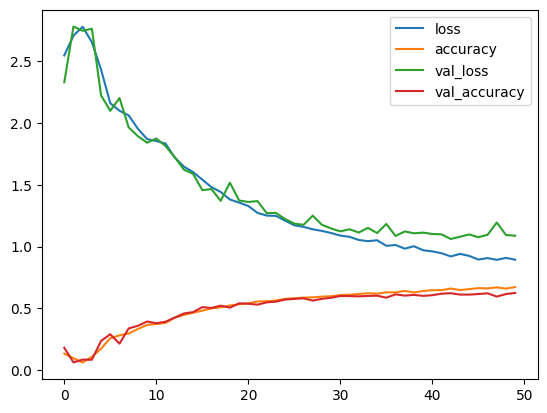

0.6258018612861633


In [ ]:

model_smote = build_model((X_train_smote.shape[1], 1))
# Validation split https://youtu.be/dzoh8cfnvnI?si=dL3Xhac5PKAUnbFT
# Shuffle to make the batch random
smote_history = model_smote.fit(X_train_smote, y_train_smote, validation_split=0.2, shuffle=True, epochs=50)

# summarize history for accuracy
pd.DataFrame(smote_history.history).plot()
plt.show()

best_score = max(smote_history.history['val_accuracy'])

print(best_score)


Epoch 1/50
351/351 [==============================] - 9s 17ms/step - loss: 2.5271 - accuracy: 0.1408 - val_loss: 2.4326 - val_accuracy: 0.1771
Epoch 2/50
351/351 [==============================] - 6s 17ms/step - loss: 2.3014 - accuracy: 0.1998 - val_loss: 2.2316 - val_accuracy: 0.2131
Epoch 3/50
351/351 [==============================] - 5s 15ms/step - loss: 2.6247 - accuracy: 0.1158 - val_loss: 2.7483 - val_accuracy: 0.0919
Epoch 4/50
351/351 [==============================] - 6s 17ms/step - loss: 2.4945 - accuracy: 0.1506 - val_loss: 2.2732 - val_accuracy: 0.2562
Epoch 5/50
351/351 [==============================] - 5s 15ms/step - loss: 2.3002 - accuracy: 0.2185 - val_loss: 2.2949 - val_accuracy: 0.2128
Epoch 6/50
351/351 [==============================] - 6s 18ms/step - loss: 2.2715 - accuracy: 0.2253 - val_loss: 2.2365 - val_accuracy: 0.2420
Epoch 7/50
351/351 [==============================] - 5s 15ms/step - loss: 2.3009 - accuracy: 0.2187 - val_loss: 2.5422 - val_accuracy: 0.1401

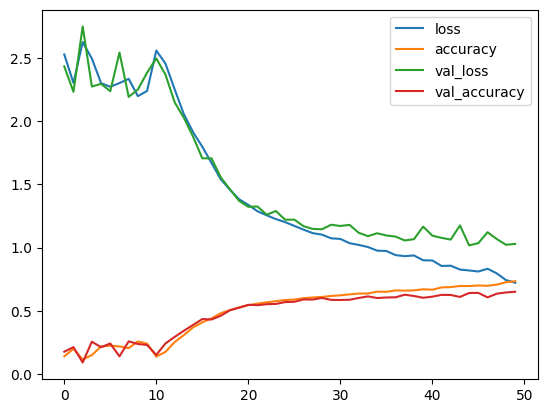

0.651104748249054


In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
model_ros = build_model((X_train_ros.shape[1], 1))

ros_history = model_ros.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)

# summarize history for accuracy
pd.DataFrame(ros_history.history).plot()
plt.show()

best_score = max(ros_history.history['val_accuracy'])

print(best_score)

Epoch 1/50
351/351 [==============================] - 19s 34ms/step - loss: 1.9951 - accuracy: 0.3308 - val_loss: 1.7163 - val_accuracy: 0.4034
Epoch 2/50
351/351 [==============================] - 10s 29ms/step - loss: 1.6373 - accuracy: 0.4515 - val_loss: 1.5521 - val_accuracy: 0.4754
Epoch 3/50
351/351 [==============================] - 10s 29ms/step - loss: 1.4669 - accuracy: 0.4997 - val_loss: 1.3888 - val_accuracy: 0.5267
Epoch 4/50
351/351 [==============================] - 10s 30ms/step - loss: 1.3251 - accuracy: 0.5346 - val_loss: 1.3130 - val_accuracy: 0.5485
Epoch 5/50
351/351 [==============================] - 10s 30ms/step - loss: 1.2448 - accuracy: 0.5653 - val_loss: 1.2920 - val_accuracy: 0.5520
Epoch 6/50
351/351 [==============================] - 10s 29ms/step - loss: 1.1809 - accuracy: 0.5846 - val_loss: 1.2931 - val_accuracy: 0.5520
Epoch 7/50
351/351 [==============================] - 10s 28ms/step - loss: 1.1560 - accuracy: 0.5955 - val_loss: 1.2100 - val_accuracy:

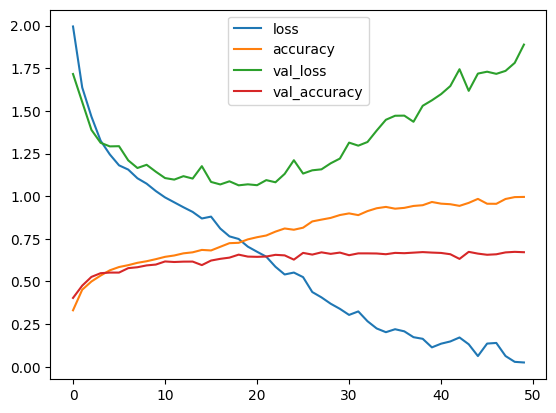

0.6735566854476929


In [ ]:

model_smote_v2 = build_model_v2((X_train_smote.shape[1], 1))
# Validation split https://youtu.be/dzoh8cfnvnI?si=dL3Xhac5PKAUnbFT
# Shuffle to make the batch random
smote_history_v2 = model_smote_v2.fit(X_train_smote, y_train_smote, validation_split=0.2, shuffle=True, epochs=50)

# summarize history for accuracy
pd.DataFrame(smote_history_v2.history).plot()
plt.show()

best_score = max(smote_history_v2.history['val_accuracy'])

print(best_score)

Epoch 1/50
351/351 [==============================] - 17s 33ms/step - loss: 2.0263 - accuracy: 0.3228 - val_loss: 1.7869 - val_accuracy: 0.3917
Epoch 2/50
351/351 [==============================] - 10s 29ms/step - loss: 1.6442 - accuracy: 0.4475 - val_loss: 1.5642 - val_accuracy: 0.4544
Epoch 3/50
351/351 [==============================] - 11s 32ms/step - loss: 1.4704 - accuracy: 0.4960 - val_loss: 1.3944 - val_accuracy: 0.5093
Epoch 4/50
351/351 [==============================] - 10s 29ms/step - loss: 1.3860 - accuracy: 0.5299 - val_loss: 1.3426 - val_accuracy: 0.5406
Epoch 5/50
351/351 [==============================] - 10s 27ms/step - loss: 1.2636 - accuracy: 0.5649 - val_loss: 1.2730 - val_accuracy: 0.5560
Epoch 6/50
351/351 [==============================] - 10s 29ms/step - loss: 1.2208 - accuracy: 0.5735 - val_loss: 1.2657 - val_accuracy: 0.5666
Epoch 7/50
351/351 [==============================] - 10s 29ms/step - loss: 1.1669 - accuracy: 0.5950 - val_loss: 1.2331 - val_accuracy:

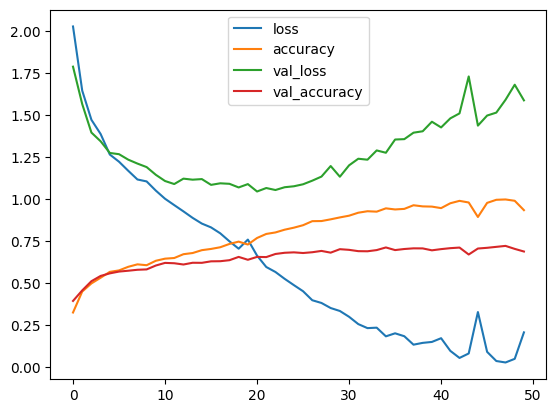

0.7195295691490173


In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
model_ros_v2 = build_model_v2((X_train_ros.shape[1], 1))

ros_history_v2 = model_ros_v2.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)

# summarize history for accuracy
pd.DataFrame(ros_history_v2.history).plot()
plt.show()

best_score = max(ros_history_v2.history['val_accuracy'])

print(best_score)

In [ ]:
X_merge = df_merged.drop(columns=['Emotions', 'Path'])
y_merge = df_merged['Emotions']
smote = SMOTE(random_state=42)
X_merge_smote, y_merge_smote = smote.fit_resample(X_merge, y_merge)

ros = RandomOverSampler(random_state=42)
X_merge_ros, y_merge_ros = ros.fit_resample(X_merge, y_merge)

Epoch 1/50
702/702 [==============================] - 29s 31ms/step - loss: 1.8496 - accuracy: 0.3832 - val_loss: 1.5559 - val_accuracy: 0.4738
Epoch 2/50
702/702 [==============================] - 20s 28ms/step - loss: 1.4320 - accuracy: 0.5108 - val_loss: 1.3103 - val_accuracy: 0.5486
Epoch 3/50
702/702 [==============================] - 21s 30ms/step - loss: 1.2473 - accuracy: 0.5648 - val_loss: 1.2380 - val_accuracy: 0.5757
Epoch 4/50
702/702 [==============================] - 21s 30ms/step - loss: 1.1863 - accuracy: 0.5828 - val_loss: 1.1373 - val_accuracy: 0.5944
Epoch 5/50
702/702 [==============================] - 20s 29ms/step - loss: 1.1729 - accuracy: 0.5881 - val_loss: 1.1834 - val_accuracy: 0.5873
Epoch 6/50
702/702 [==============================] - 21s 29ms/step - loss: 1.0887 - accuracy: 0.6095 - val_loss: 1.1120 - val_accuracy: 0.6076
Epoch 7/50
702/702 [==============================] - 20s 28ms/step - loss: 1.0398 - accuracy: 0.6237 - val_loss: 1.0690 - val_accuracy:

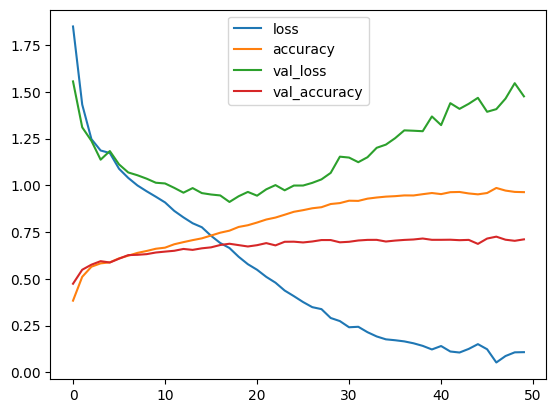

0.7255880236625671


In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_merge_smote, y_merge_smote, test_size=0.2, random_state=42)
model_smote_v3 = build_model_v2((X_train_smote.shape[1], 1))
smote_history_v3 = model_smote_v3.fit(X_train_smote, y_train_smote, validation_split=0.2, shuffle=True, epochs=50)

pd.DataFrame(smote_history_v3.history).plot()
plt.show()

best_score = max(smote_history_v3.history['val_accuracy'])

print(best_score)

Epoch 1/50
702/702 [==============================] - 29s 32ms/step - loss: 1.9116 - accuracy: 0.3565 - val_loss: 1.7315 - val_accuracy: 0.3999
Epoch 2/50
702/702 [==============================] - 20s 29ms/step - loss: 1.5316 - accuracy: 0.4785 - val_loss: 1.3910 - val_accuracy: 0.5290
Epoch 3/50
702/702 [==============================] - 21s 30ms/step - loss: 1.3316 - accuracy: 0.5397 - val_loss: 1.2310 - val_accuracy: 0.5745
Epoch 4/50
702/702 [==============================] - 21s 30ms/step - loss: 1.2117 - accuracy: 0.5755 - val_loss: 1.1770 - val_accuracy: 0.5870
Epoch 5/50
702/702 [==============================] - 21s 30ms/step - loss: 1.1472 - accuracy: 0.5937 - val_loss: 1.1415 - val_accuracy: 0.5968
Epoch 6/50
702/702 [==============================] - 22s 31ms/step - loss: 1.0870 - accuracy: 0.6131 - val_loss: 1.0951 - val_accuracy: 0.6098
Epoch 7/50
702/702 [==============================] - 20s 29ms/step - loss: 1.0372 - accuracy: 0.6281 - val_loss: 1.0797 - val_accuracy:

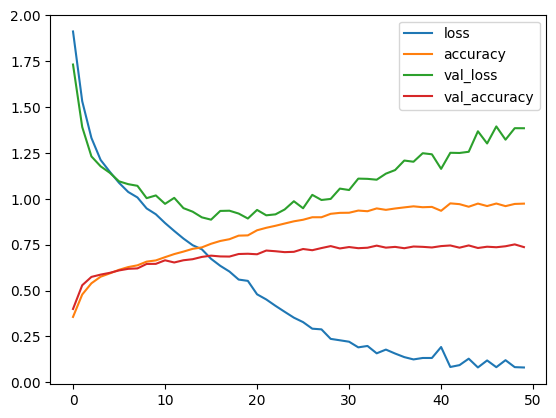

0.7516037225723267


In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_merge_ros, y_merge_ros, test_size=0.2, random_state=42)
model_ros_v3 = build_model_v2((X_train_ros.shape[1], 1))
ros_history_v4 = model_ros_v3.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)

pd.DataFrame(ros_history_v4.history).plot()
plt.show()

best_score = max(ros_history_v4.history['val_accuracy'])

print(best_score)

## Evaluated that ROS showed better results

In [ ]:
data_path = pd.read_csv('../../Datasets/aug_final_df.csv')
labels = data_path['Emotions']
data_path = get_mel_spectrogram(data_path)
data_path['Emotions'] = labels
clean_data_path = pd.read_csv('../../Datasets/final_df.csv')
clean_data_path.drop(columns=['Unnamed: 0', 'Emotions_without_gender'], axis=1, inplace=True)
clean_data_path.rename(columns={"Emotions_with_gender": "Emotions"}, inplace=True)
labels = clean_data_path['Emotions']
clean_data_path = get_mel_spectrogram(clean_data_path)
clean_data_path['Emotions'] = labels

df_mel_merged = pd.concat([data_path, clean_data_path], ignore_index=True, sort=False)

df_mel_merged = shuffle(df_mel_merged)
df_mel_merged.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127,Emotions
21617,0.041689,0.001148,0.000222,0.000136,0.005609,0.322227,0.869722,0.451725,0.584765,0.340224,...,1.199291e-03,1.327179e-03,1.003936e-03,6.247528e-04,5.395214e-04,5.042151e-04,2.781891e-04,1.247330e-04,9.227242e-06,7
12979,0.000023,0.000025,0.000057,0.000135,0.000460,0.003226,0.016829,0.099256,0.137896,0.056241,...,4.667907e-04,4.558288e-04,3.056431e-04,2.450862e-04,1.697715e-04,2.070339e-04,3.422612e-04,2.960847e-04,1.898061e-05,7
6186,0.052933,0.017581,0.042543,0.070994,0.136193,0.170307,0.048457,0.087700,0.122990,0.165359,...,3.253139e-05,3.337036e-05,2.812296e-05,2.772246e-05,2.882366e-05,2.902345e-05,2.927265e-05,2.992643e-05,3.188846e-05,10
8792,0.004661,0.038902,0.087587,0.153599,0.127193,0.087673,0.089328,0.130697,0.124600,0.362655,...,1.625987e-03,1.572643e-03,1.534933e-03,1.545467e-03,1.697529e-03,1.489257e-03,1.489999e-03,1.583187e-03,1.664740e-03,13
14952,0.069186,0.032090,0.039721,0.080268,0.500852,0.505777,0.102851,0.174984,0.388791,0.556986,...,1.572122e-09,1.432917e-09,1.335176e-09,1.263199e-09,1.209993e-09,1.171687e-09,1.143981e-09,1.125935e-09,1.114837e-09,14


In [ ]:
X_merge = df_mel_merged.drop(columns=['Emotions'])
y_merge = df_mel_merged['Emotions']

ros = RandomOverSampler(random_state=42)
X_merge_ros, y_merge_ros = ros.fit_resample(X_merge, y_merge)

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_merge_ros, y_merge_ros, test_size=0.2, random_state=42)
model_ros_GRU = build_model_GRU((X_train_ros.shape[1], 1))
model_ros_GRU.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128, 128)          50304     
                                                                 
 gru_1 (GRU)                 (None, 128, 128)          99072     
                                                                 
 gru_2 (GRU)                 (None, 128)               99072     
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
Total params: 250512 (978.56 KB)
Trainable params: 250512 (978.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_ros_lstm = build_model_LSTM((X_train_ros.shape[1], 1))
model_ros_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 128, 128)          66560     
                                                                 
 lstm_21 (LSTM)              (None, 128, 128)          131584    
                                                                 
 lstm_22 (LSTM)              (None, 128)               131584    
                                                                 
 dense_10 (Dense)            (None, 16)                2064      
                                                                 
Total params: 331792 (1.27 MB)
Trainable params: 331792 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_ros_LSTM_GRU = build_model_LSTM_GRU((X_train_ros.shape[1], 1))
model_ros_LSTM_GRU.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 128, 128)          66560     
                                                                 
 lstm_24 (LSTM)              (None, 128, 128)          131584    
                                                                 
 gru_4 (GRU)                 (None, 128)               99072     
                                                                 
 dense_11 (Dense)            (None, 16)                2064      
                                                                 
Total params: 299280 (1.14 MB)
Trainable params: 299280 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
702/702 [==============================] - 19s 19ms/step - loss: 2.6281 - accuracy: 0.1066 - val_loss: 2.3224 - val_accuracy: 0.1949
Epoch 2/50
702/702 [==============================] - 12s 17ms/step - loss: 2.2020 - accuracy: 0.2376 - val_loss: 2.1029 - val_accuracy: 0.2760
Epoch 3/50
702/702 [==============================] - 12s 18ms/step - loss: 1.8540 - accuracy: 0.3665 - val_loss: 1.6316 - val_accuracy: 0.4371
Epoch 4/50
702/702 [==============================] - 12s 18ms/step - loss: 1.4904 - accuracy: 0.4966 - val_loss: 1.4027 - val_accuracy: 0.5335
Epoch 5/50
702/702 [==============================] - 12s 18ms/step - loss: 1.3042 - accuracy: 0.5544 - val_loss: 1.2667 - val_accuracy: 0.5709
Epoch 6/50
702/702 [==============================] - 13s 19ms/step - loss: 1.2142 - accuracy: 0.5839 - val_loss: 1.2399 - val_accuracy: 0.5727
Epoch 7/50
702/702 [==============================] - 13s 19ms/step - loss: 1.1508 - accuracy: 0.6045 - val_loss: 1.2002 - val_accuracy:

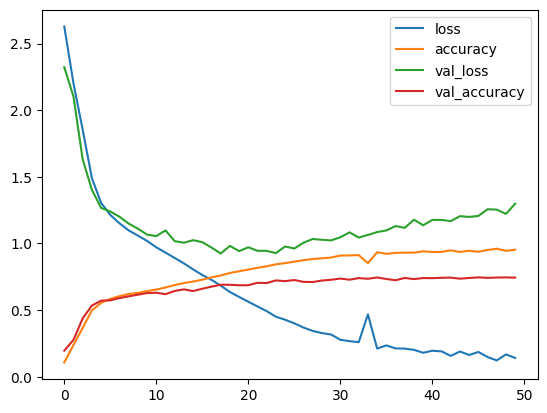

0.9605702757835388


In [ ]:
ros_gru_history = model_ros_GRU.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_gru_history.history).plot()
plt.show()

best_score = max(ros_gru_history.history['accuracy'])

print(best_score)

Epoch 1/50
702/702 [==============================] - 18s 20ms/step - loss: 2.4420 - accuracy: 0.1576 - val_loss: 2.3676 - val_accuracy: 0.1821
Epoch 2/50
702/702 [==============================] - 13s 18ms/step - loss: 2.3463 - accuracy: 0.1881 - val_loss: 2.3203 - val_accuracy: 0.1919
Epoch 3/50
702/702 [==============================] - 13s 18ms/step - loss: 2.2902 - accuracy: 0.1982 - val_loss: 2.2766 - val_accuracy: 0.2026
Epoch 4/50
702/702 [==============================] - 13s 18ms/step - loss: 2.3227 - accuracy: 0.2012 - val_loss: 2.2935 - val_accuracy: 0.2097
Epoch 5/50
702/702 [==============================] - 13s 18ms/step - loss: 2.6501 - accuracy: 0.1065 - val_loss: 2.7414 - val_accuracy: 0.0761
Epoch 6/50
702/702 [==============================] - 13s 18ms/step - loss: 2.7340 - accuracy: 0.0799 - val_loss: 2.7282 - val_accuracy: 0.0900
Epoch 7/50
702/702 [==============================] - 14s 19ms/step - loss: 2.7182 - accuracy: 0.0875 - val_loss: 2.6056 - val_accuracy:

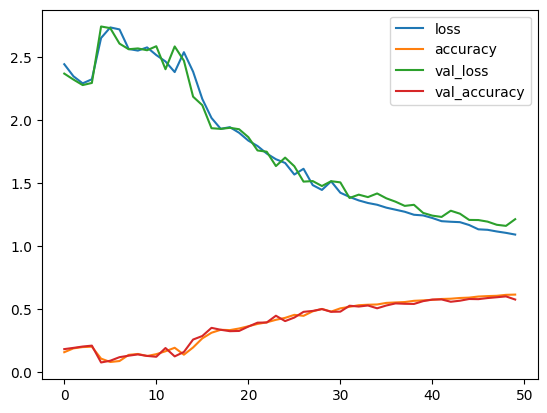

0.6146580576896667


In [ ]:
ros_lstm_history = model_ros_lstm.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_lstm_history.history).plot()
plt.show()

best_score = max(ros_lstm_history.history['accuracy'])

print(best_score)

Epoch 1/50
702/702 [==============================] - 19s 20ms/step - loss: 2.3976 - accuracy: 0.1804 - val_loss: 2.3188 - val_accuracy: 0.2060
Epoch 2/50
702/702 [==============================] - 14s 20ms/step - loss: 2.1411 - accuracy: 0.2675 - val_loss: 2.0192 - val_accuracy: 0.3027
Epoch 3/50
702/702 [==============================] - 25s 36ms/step - loss: 1.8805 - accuracy: 0.3516 - val_loss: 1.8705 - val_accuracy: 0.3614
Epoch 4/50
702/702 [==============================] - 13s 18ms/step - loss: 1.6212 - accuracy: 0.4474 - val_loss: 1.4997 - val_accuracy: 0.4979
Epoch 5/50
702/702 [==============================] - 14s 19ms/step - loss: 1.4265 - accuracy: 0.5142 - val_loss: 1.4011 - val_accuracy: 0.5228
Epoch 6/50
702/702 [==============================] - 13s 18ms/step - loss: 1.3102 - accuracy: 0.5466 - val_loss: 1.3191 - val_accuracy: 0.5403
Epoch 7/50
702/702 [==============================] - 14s 20ms/step - loss: 1.2374 - accuracy: 0.5698 - val_loss: 1.2508 - val_accuracy:

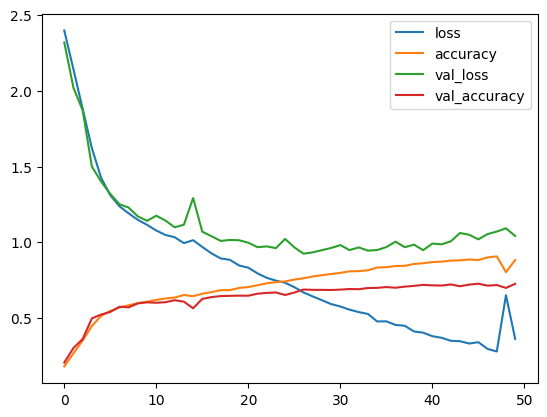

0.9068389534950256


In [ ]:
ros_lstm_gru_history = model_ros_LSTM_GRU.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_lstm_gru_history.history).plot()
plt.show()

best_score = max(ros_lstm_gru_history.history['accuracy'])

print(best_score)

In [ ]:
print(max(ros_gru_history.history['val_accuracy']), max(ros_lstm_history.history['val_accuracy']), max(ros_lstm_gru_history.history['val_accuracy']))

0.7451888918876648 0.6003207564353943 0.7266571521759033


In [4]:
data_path = pd.read_csv('../../Datasets/aug_final_df.csv')
clean_data_path = pd.read_csv('../../Datasets/final_df.csv')

# data_path = pd.read_csv('aug_final_df.csv')
# clean_data_path = pd.read_csv('final_df.csv')
clean_data_path.drop(columns=['Unnamed: 0', 'Emotions_without_gender'], axis=1, inplace=True)
clean_data_path.rename(columns={"Emotions_with_gender": "Emotions"}, inplace=True)
df_merged = pd.concat([data_path, clean_data_path], ignore_index=True, sort=False)
df_merged = shuffle(df_merged)
df_merged.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
3521,13,Crema\1026_IWW_NEU_XX.wav,-403.342433,127.800095,36.920921,27.406051,-2.188284,13.528429,-6.483464,-5.041815,...,6.323492e-06,5.955854e-06,6.293475e-06,5.123098e-06,-0.022056,-0.035451,-0.074426,-0.017972,0.029083,-0.019068
824,8,Ravdess\03-01-05-02-02-01-09.wav,-233.915622,30.128414,-12.566120,-2.133688,-3.509996,-12.697379,-12.252222,-6.050984,...,6.645387e-03,6.988657e-03,3.871374e-03,1.807767e-03,-0.020514,0.013786,-0.009908,0.042502,-0.004774,-0.001296
18995,0,Crema\1072_TSI_ANG_XX.wav,-327.654480,92.962020,20.455807,46.646015,0.047883,6.369848,-15.157878,1.129501,...,8.515931e-09,8.358167e-09,8.256588e-09,8.193404e-09,-0.012131,-0.006923,-0.021802,-0.054716,0.013089,0.006175
4784,10,Crema\1042_DFA_DIS_XX.wav,-306.514512,71.138777,23.557294,36.917702,18.442718,-4.477018,-11.028483,-6.423005,...,2.808743e-04,2.552040e-04,2.824326e-04,2.774673e-04,0.021909,-0.026266,-0.079305,-0.052649,0.007373,0.002324
2581,8,Crema\1015_IEO_ANG_HI.wav,-274.081064,90.553742,-1.319409,28.355147,-3.295721,4.588043,-4.467366,6.737204,...,8.556761e-05,8.468779e-05,8.021102e-05,7.766276e-05,-0.016402,-0.013311,-0.054505,0.011296,0.012550,0.009563


In [5]:
X_merge = df_merged.drop(columns=['Emotions', 'Path'])
y_merge = df_merged['Emotions']

ros = RandomOverSampler(random_state=42)
X_merge_full, y_merge_full = ros.fit_resample(X_merge, y_merge)

In [8]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_merge_full, y_merge_full, test_size=0.2, random_state=42)
model_ros_full_GRU = build_model_GRU((X_train_full.shape[1], 1))
model_ros_full_lstm = build_model_LSTM((X_train_full.shape[1], 1))
model_ros_full_LSTM_GRU = build_model_LSTM_GRU((X_train_full.shape[1], 1))

In [9]:
X_merge.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
3521,-403.342433,127.800095,36.920921,27.406051,-2.188284,13.528429,-6.483464,-5.041815,-11.866436,-3.711936,...,6.323492e-06,5.955854e-06,6.293475e-06,5.123098e-06,-0.022056,-0.035451,-0.074426,-0.017972,0.029083,-0.019068
824,-233.915622,30.128414,-12.566120,-2.133688,-3.509996,-12.697379,-12.252222,-6.050984,-4.201130,-5.536225,...,6.645387e-03,6.988657e-03,3.871374e-03,1.807767e-03,-0.020514,0.013786,-0.009908,0.042502,-0.004774,-0.001296
18995,-327.654480,92.962020,20.455807,46.646015,0.047883,6.369848,-15.157878,1.129501,-12.272820,3.611484,...,8.515931e-09,8.358167e-09,8.256588e-09,8.193404e-09,-0.012131,-0.006923,-0.021802,-0.054716,0.013089,0.006175
4784,-306.514512,71.138777,23.557294,36.917702,18.442718,-4.477018,-11.028483,-6.423005,-7.248987,1.076233,...,2.808743e-04,2.552040e-04,2.824326e-04,2.774673e-04,0.021909,-0.026266,-0.079305,-0.052649,0.007373,0.002324
2581,-274.081064,90.553742,-1.319409,28.355147,-3.295721,4.588043,-4.467366,6.737204,-10.724703,-0.477870,...,8.556761e-05,8.468779e-05,8.021102e-05,7.766276e-05,-0.016402,-0.013311,-0.054505,0.011296,0.012550,0.009563


Epoch 1/50
702/702 [==============================] - 25s 28ms/step - loss: 2.3491 - accuracy: 0.2209 - val_loss: 2.0310 - val_accuracy: 0.3191
Epoch 2/50
702/702 [==============================] - 16s 23ms/step - loss: 1.8542 - accuracy: 0.3906 - val_loss: 1.7955 - val_accuracy: 0.4002
Epoch 3/50
702/702 [==============================] - 16s 23ms/step - loss: 1.5954 - accuracy: 0.4583 - val_loss: 1.5406 - val_accuracy: 0.4738
Epoch 4/50
702/702 [==============================] - 22s 31ms/step - loss: 1.4132 - accuracy: 0.5153 - val_loss: 1.3373 - val_accuracy: 0.5408
Epoch 5/50
702/702 [==============================] - 15s 21ms/step - loss: 1.2659 - accuracy: 0.5631 - val_loss: 1.2223 - val_accuracy: 0.5764
Epoch 6/50
702/702 [==============================] - 17s 24ms/step - loss: 1.1642 - accuracy: 0.5946 - val_loss: 1.1708 - val_accuracy: 0.5957
Epoch 7/50
702/702 [==============================] - 15s 22ms/step - loss: 1.1076 - accuracy: 0.6134 - val_loss: 1.1077 - val_accuracy:

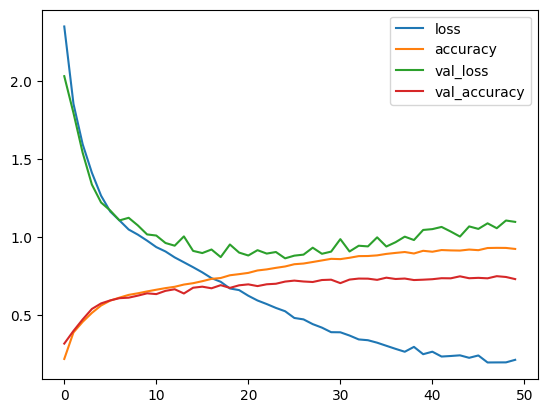

0.932011604309082


In [ ]:
ros_full_gru_history = model_ros_full_GRU.fit(X_train_full, y_train_full, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_full_gru_history.history).plot()
plt.show()

best_score = max(ros_full_gru_history.history['accuracy'])

print(best_score)

Epoch 1/50
702/702 [==============================] - 22s 25ms/step - loss: 2.3786 - accuracy: 0.1878 - val_loss: 2.3244 - val_accuracy: 0.2190
Epoch 2/50
702/702 [==============================] - 15s 22ms/step - loss: 2.2694 - accuracy: 0.2307 - val_loss: 2.2105 - val_accuracy: 0.2429
Epoch 3/50
702/702 [==============================] - 16s 22ms/step - loss: 2.3623 - accuracy: 0.2098 - val_loss: 2.4853 - val_accuracy: 0.1415
Epoch 4/50
702/702 [==============================] - 16s 22ms/step - loss: 2.3000 - accuracy: 0.2135 - val_loss: 2.2388 - val_accuracy: 0.2174
Epoch 5/50
702/702 [==============================] - 16s 23ms/step - loss: 2.0286 - accuracy: 0.3156 - val_loss: 1.9069 - val_accuracy: 0.3635
Epoch 6/50
702/702 [==============================] - 17s 24ms/step - loss: 1.9093 - accuracy: 0.3599 - val_loss: 1.8957 - val_accuracy: 0.3689
Epoch 7/50
702/702 [==============================] - 17s 24ms/step - loss: 1.8431 - accuracy: 0.3828 - val_loss: 1.7844 - val_accuracy:

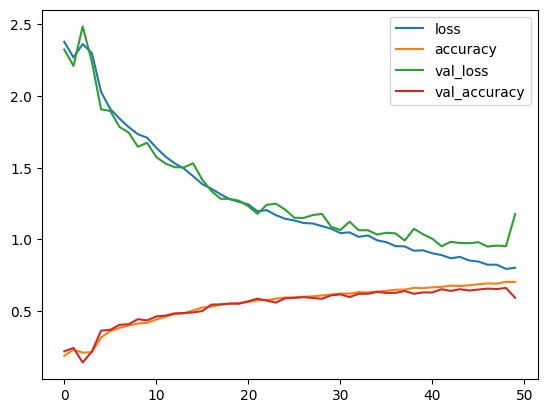

0.7041211724281311


In [ ]:
ros_full_lstm_history = model_ros_full_lstm.fit(X_train_full, y_train_full, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_full_lstm_history.history).plot()
plt.show()

best_score = max(ros_full_lstm_history.history['accuracy'])

print(best_score)

Epoch 1/50
702/702 [==============================] - 21s 23ms/step - loss: 2.4196 - accuracy: 0.1804 - val_loss: 2.2947 - val_accuracy: 0.2240
Epoch 2/50
702/702 [==============================] - 15s 22ms/step - loss: 2.2925 - accuracy: 0.2229 - val_loss: 2.2659 - val_accuracy: 0.2509
Epoch 3/50
702/702 [==============================] - 15s 22ms/step - loss: 2.1077 - accuracy: 0.2995 - val_loss: 1.9269 - val_accuracy: 0.3608
Epoch 4/50
702/702 [==============================] - 16s 23ms/step - loss: 1.8436 - accuracy: 0.3881 - val_loss: 1.7633 - val_accuracy: 0.4278
Epoch 5/50
702/702 [==============================] - 17s 24ms/step - loss: 1.6255 - accuracy: 0.4512 - val_loss: 1.5467 - val_accuracy: 0.4784
Epoch 6/50
702/702 [==============================] - 16s 23ms/step - loss: 1.4215 - accuracy: 0.5123 - val_loss: 1.3608 - val_accuracy: 0.5347
Epoch 7/50
702/702 [==============================] - 17s 24ms/step - loss: 1.3274 - accuracy: 0.5419 - val_loss: 1.3140 - val_accuracy:

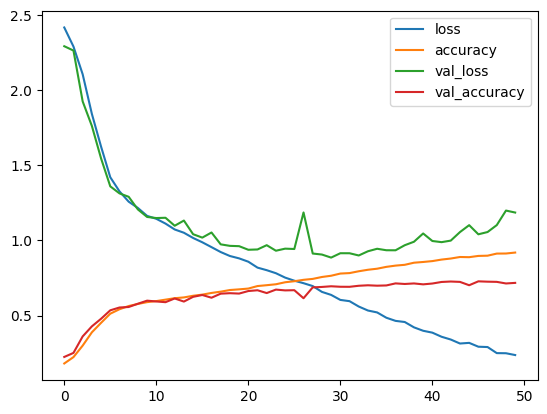

0.9196257591247559


In [ ]:
ros_full_lstm_gru_history = model_ros_full_LSTM_GRU.fit(X_train_full, y_train_full, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_full_lstm_gru_history.history).plot()
plt.show()

best_score = max(ros_full_lstm_gru_history.history['accuracy'])

print(best_score)

In [ ]:
print(max(ros_full_gru_history.history['val_accuracy']), max(ros_full_lstm_history.history['val_accuracy']), max(ros_full_lstm_gru_history.history['val_accuracy']))

0.7507127523422241 0.6614397764205933 0.7279044985771179


In [10]:
def create_model(input_shape, hidden_size, learning_rate, num_classes=16):

    model = keras.Sequential()
    model.add(GRU(units=hidden_size, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=hidden_size, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=hidden_size))

    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

    # Use categorical crossentropy if labels are one hot encoded
    # Use sparse categorical crossentropy if labels are label encoded meaning they are represented by integers
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Set the batch_size parameter for model.fit
    model.batch_size = 32

    return model

def create_model_final(input_shape, hidden_size, learning_rate,):
    model = keras.Sequential()
    model.add(GRU(units=hidden_size, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=hidden_size, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=hidden_size))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
#X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_merge_full, y_merge_full, test_size=0.2, random_state=42)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Define the hyperparameters search space
hyperparam_distribution_range = {
    'learning_rate': [0.0001, 0.001],
    'hidden_size': [128]
}

best_accuracy = 0.0
best_hyperparameters = {}

for learning_rate in hyperparam_distribution_range['learning_rate']:
    for hidden_size in hyperparam_distribution_range['hidden_size']:
        print(hidden_size, learning_rate)
        # Build the model
        model = create_model_final((X_train_val.shape[1],1), hidden_size, learning_rate)

        # Train the model
        model.fit(X_train_val, y_train_val, epochs=100, verbose=0)

        # Evaluate the model on the test data
        test_loss, test_acc = model.evaluate(X_test_val, y_test_val)

        # Check if this model has the best accuracy so far
        if test_acc > best_accuracy:
            best_accuracy = test_acc
            best_hyperparameters = {
                'hidden_size': hidden_size,
                'learning_rate': learning_rate,
            }

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Accuracy:", best_accuracy)

128 0.0001
176/176 [==============================] - 3s 9ms/step - loss: 0.9596 - accuracy: 0.6563
128 0.001
176/176 [==============================] - 4s 13ms/step - loss: 1.2596 - accuracy: 0.7578
Best Hyperparameters:
{'hidden_size': 128, 'learning_rate': 0.001}
Best Accuracy: 0.7578403353691101


Epoch 1/80
877/877 [==============================] - 27s 24ms/step - loss: 2.3537 - accuracy: 0.2120
Epoch 2/80
877/877 [==============================] - 19s 21ms/step - loss: 1.9882 - accuracy: 0.3369
Epoch 3/80
877/877 [==============================] - 18s 20ms/step - loss: 1.5828 - accuracy: 0.4647
Epoch 4/80
877/877 [==============================] - 18s 20ms/step - loss: 1.3249 - accuracy: 0.5445
Epoch 5/80
877/877 [==============================] - 19s 21ms/step - loss: 1.1998 - accuracy: 0.5807
Epoch 6/80
877/877 [==============================] - 18s 21ms/step - loss: 1.1283 - accuracy: 0.6064
Epoch 7/80
877/877 [==============================] - 19s 21ms/step - loss: 1.0599 - accuracy: 0.6255
Epoch 8/80
877/877 [==============================] - 18s 21ms/step - loss: 1.0153 - accuracy: 0.6391
Epoch 9/80
877/877 [==============================] - 18s 20ms/step - loss: 0.9727 - accuracy: 0.6536
Epoch 10/80
877/877 [==============================] - 19s 21ms/step - loss: 0.922

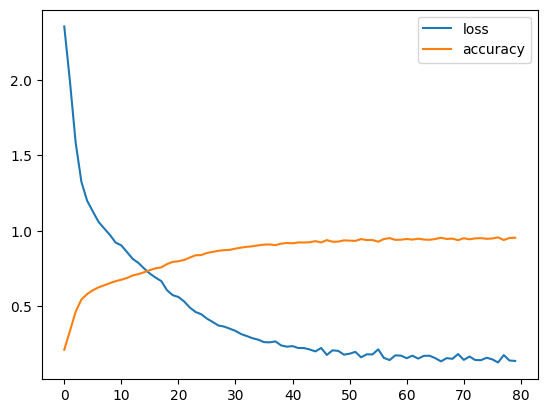

In [12]:
#X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_merge_full, y_merge_full, test_size=0.2, random_state=42)
final_ros_model = create_model_final((X_train_full.shape[1],1), 128, 0.001)


final_ros_history = final_ros_model.fit(X_train_full, y_train_full, epochs=80)
pd.DataFrame(final_ros_history.history).plot()
plt.show()

In [13]:
loss, acc = final_ros_model.evaluate(X_test_full, y_test_full)
print(f"Test accuracy: {acc:.4f}")
final_ros_model.save('final_ros_model.keras')

220/220 [==============================] - 3s 11ms/step - loss: 0.9796 - accuracy: 0.7936
Test accuracy: 0.7936


220/220 [==============================] - 4s 16ms/step


Text(0.5, 58.5815972222222, 'Predicted emotion')

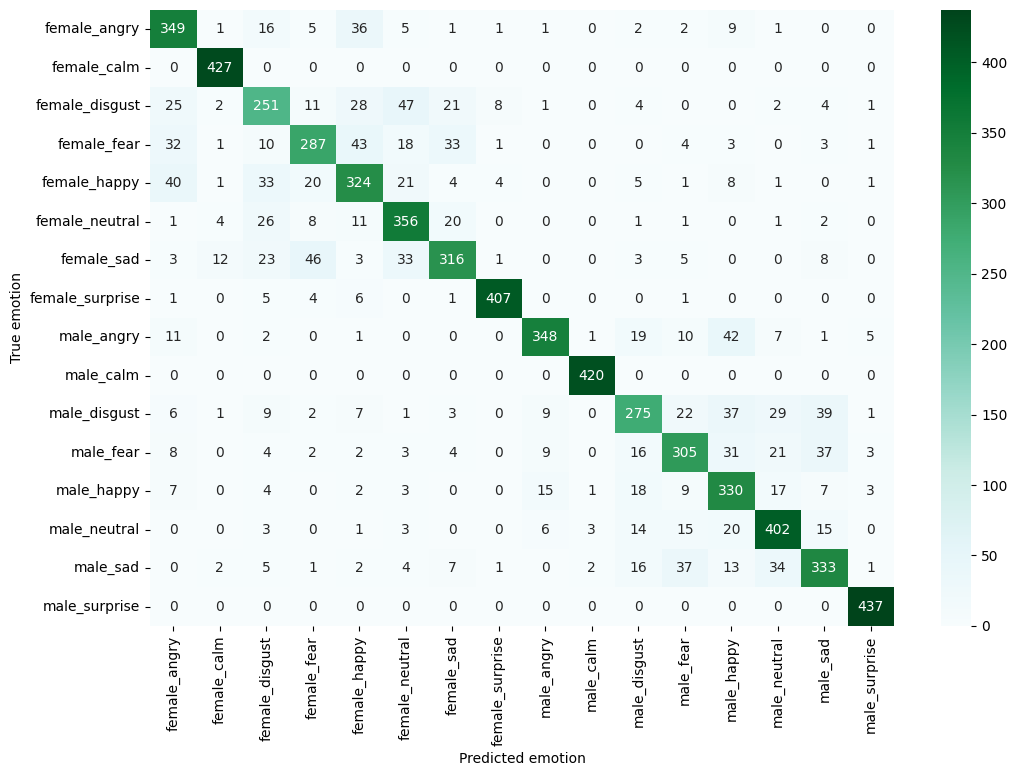

In [16]:
from sklearn.metrics import confusion_matrix

# Get predicted labels
y_pred = final_ros_model.predict(X_test_full)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_full, y_pred_class)

index = ['female_angry', 'female_calm', 'female_disgust', 'female_fear', 'female_happy', 'female_neutral', 'female_sad', 'female_surprise',
         'male_angry', 'male_calm', 'male_disgust', 'male_fear', 'male_happy', 'male_neutral', 'male_sad', 'male_surprise']
columns = ['female_angry', 'female_calm', 'female_disgust', 'female_fear', 'female_happy', 'female_neutral', 'female_sad', 'female_surprise',
         'male_angry', 'male_calm', 'male_disgust', 'male_fear', 'male_happy', 'male_neutral', 'male_sad', 'male_surprise']


# Plot confusion matrix
cm_df = pd.DataFrame(cm,index,columns)
plt.figure(figsize=(12,8))
ax = plt.axes()

sns.heatmap(cm_df, ax = ax, cmap = 'BuGn', fmt="d", annot=True)
ax.set_ylabel('True emotion')
ax.set_xlabel('Predicted emotion')

In [17]:
# import metrics from sklearn library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Possible values for average paramter: micro, macro, weighted, samples

# Compute accuracy
accuracy = accuracy_score(y_test_full, y_pred_class)
print(f'Accuracy: {accuracy}')

# Compute precision
precision = precision_score(y_test_full, y_pred_class, average='weighted')
print(f'Precision: {precision}')

# Compute recall
recall = recall_score(y_test_full, y_pred_class, average='weighted')
print(f'Recall: {recall}')

# Compute F1 score
f1 = f1_score(y_test_full, y_pred_class, average='weighted')
print(f'F1-score: {f1}')

Accuracy: 0.7935851746258018
Precision: 0.7943699965020217
Recall: 0.7935851746258018
F1-score: 0.7922346472052716


In [18]:
# Test set prediction accuracy rates

values = cm.diagonal()
row_sum = np.sum(cm,axis=1)
acc = values / row_sum

print('Test set predicted emotions accuracy:')
for e in range(0, len(values)):
    print(index[e],':', f"{(acc[e]):0.4f}")

Test set predicted emotions accuracy:
female_angry : 0.8135
female_calm : 1.0000
female_disgust : 0.6198
female_fear : 0.6583
female_happy : 0.6998
female_neutral : 0.8260
female_sad : 0.6976
female_surprise : 0.9576
male_angry : 0.7785
male_calm : 1.0000
male_disgust : 0.6236
male_fear : 0.6854
male_happy : 0.7933
male_neutral : 0.8340
male_sad : 0.7271
male_surprise : 1.0000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>